In [52]:
import pandas as pd

In [53]:
poblacion_65_mas = pd.read_csv("poblacion +65 por comunidades.csv", sep="\t", encoding = "latin-1",)
residencias_españa = pd.read_csv("residencias_españa_plazas.csv", sep=";", encoding = "latin-1" )

In [54]:
poblacion_65_mas = poblacion_65_mas.drop(columns=["Total Nacional", "Españoles/Extranjeros", "Sexo"])

poblacion_65_mas["Comunidades y Ciudades Autónomas"] = poblacion_65_mas["Comunidades y Ciudades Autónomas"].fillna("España")

poblacion_65_mas['Total'] = poblacion_65_mas['Total'].apply(lambda x: int(x.replace('.', '')))
poblacion_65_mas['Año'] = poblacion_65_mas['Año'].astype(str)
poblacion_65_mas = poblacion_65_mas.groupby(poblacion_65_mas.index // 8).agg({'Comunidades y Ciudades Autónomas': 'first',
                                     'Edad (grupos quinquenales)': lambda x: ', '.join(x),
                                     'Año': lambda x: ', '.join(x),
                                     'Total': 'sum'})


poblacion_65_mas['Edad'] = poblacion_65_mas['Edad (grupos quinquenales)'].apply(lambda x: "65 -100 años y mas")
poblacion_65_mas.drop(columns=['Edad (grupos quinquenales)'], inplace=True)

poblacion_65_mas['Fecha'] = poblacion_65_mas['Año'].apply(lambda x: "2022")
poblacion_65_mas.drop(columns=['Año'], inplace=True)

poblacion_65_mas['Comunidades y Ciudades Autónomas'] = poblacion_65_mas['Comunidades y Ciudades Autónomas'].replace('\d+', '', regex=True)



In [55]:
residencias_españa["< 25 plazas"] = residencias_españa["< 25 plazas"].fillna(0).astype("str")
residencias_españa[" 25 - 49"] = residencias_españa[" 25 - 49"].fillna(0).astype("str")
residencias_españa["50 - 99"] = residencias_españa["50 - 99"].fillna(0).astype("str")
residencias_españa[">= 100"] = residencias_españa[">= 100"].fillna(0).astype("str")
residencias_españa["TOTAL"] = residencias_españa["TOTAL"].fillna(0).astype("str")
residencias_españa["Año"] = residencias_españa["Año"].fillna(0).astype("str")

residencias_españa = residencias_españa.replace("\.", "", regex = True)

residencias_españa = residencias_españa.drop(columns=["Año"])

residencias_españa.at[0, "Residencias"] = "España"

residencias_españa = residencias_españa.rename(columns= {"Residencias": "Comunidades y Ciudades Autónomas"})

In [56]:
residencias_españa.head()

,Comunidades y Ciudades Autónomas,< 25 plazas,25 - 49,50 - 99,>= 100,TOTAL
0,España,2018,55328,111724,197019,384251
1,Andalucía,1991,8701,11776,21117,43585
2,Almería,80,5470,9120,2019,3486
3,Cádiz,1300,9110,122,317,5431
4,Córdoba,1330,1327,1961,2223,5644


In [57]:
poblacion_65_mas.head()

,Comunidades y Ciudades Autónomas,Total,Edad,Fecha
0,España,9479010,65 -100 años y mas,2022
1,Andalucía,1526988,65 -100 años y mas,2022
2,Aragón,292934,65 -100 años y mas,2022
3,"Asturias, Principado de",272856,65 -100 años y mas,2022
4,"Balears, Illes",192285,65 -100 años y mas,2022


In [ ]:
pip install openpyxl

In [59]:
# with pd.ExcelWriter("mayores_españa.xlsx", engine = "openpyxl") as writer: poblacion_65_mas.to_excel(writer, index = False)

In [60]:
# with pd.ExcelWriter("resis_españa.xlsx", engine = "openpyxl") as writer: residencias_españa.to_excel(writer, index = False)

In [61]:
# df_merged = pd.merge(poblacion_65_mas, residencias_españa, on = "Comunidades y Ciudades Autónomas")
# df_merged.fillna(0, inplace=True)
# df_merged.head()
"""
nada, no se que falla, pero no doy con ello...
voy a unirlos en excel y lo vuelvo a importar, es que si no no puedo avanzar mas"""

'\nnada, no se que falla, pero no doy con ello...\nvoy a unirlos en excel y lo vuelvo a importar, es que si no no puedo avanzar mas'

In [62]:
resis_españa_merge = pd.read_csv("merge_españa_.csv", sep=";", encoding = "UTF-8" )
serie_mayores_2000_2022 = pd.read_csv("poblacion +64 2000-2020_España.csv", sep=";")

In [63]:
serie_mayores_2000_2022 = serie_mayores_2000_2022.rename(columns={"Unnamed: 0":"poblacion_por_edades"})

In [64]:
resis_españa_merge.head()

,Comunidades y Ciudades Autónomas,< 25 camas,25 - 49,50 - 99,>= 100,camas_totales,Población,Edad,Fecha
0,España,20180,55328,111724,197019,384251,9479010,>64 años,2022
1,Andalucía,1991,8701,11776,21117,43585,1526988,>64 años,2022
2,Aragón,766,2978,6808,7742,18294,292934,>64 años,2022
3,Asturias (Principado de),1440,2046,3759,7319,14564,272856,>64 años,2022
4,Balears (Illes),57,575,1242,3124,4998,192285,>64 años,2022


In [65]:
resis_españa_merge["camas_totales"].sum()

768502

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
tamaños_residencia= {"Tamaño del centro": ["-25 plazas", "26-49", "50-99", "+100 plazas"],
                     "Numero de plazas": [resis_españa_merge["< 25 camas"].sum(),resis_españa_merge["25 - 49"].sum(),resis_españa_merge["50 - 99"].sum(),resis_españa_merge[">= 100"].sum()]}

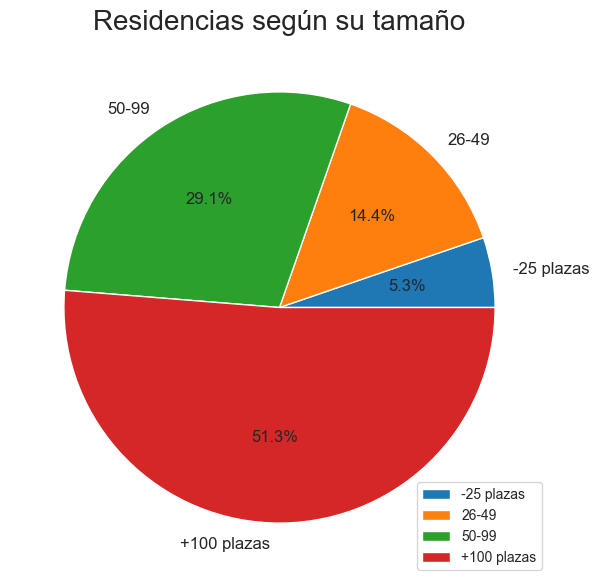

In [68]:
fig, ax = plt.subplots(figsize=(7,7))
ax.pie(tamaños_residencia["Numero de plazas"], labels = tamaños_residencia["Tamaño del centro"], autopct="%1.1f%%", textprops={"fontsize":12} )
ax.set_title("Residencias según su tamaño", fontsize = 20)
ax.legend(loc = "lower right")
plt.show()

In [69]:
resis_españa_merge.shape

(20, 9)

In [70]:
resis_españa_merge.head()

,Comunidades y Ciudades Autónomas,< 25 camas,25 - 49,50 - 99,>= 100,camas_totales,Población,Edad,Fecha
0,España,20180,55328,111724,197019,384251,9479010,>64 años,2022
1,Andalucía,1991,8701,11776,21117,43585,1526988,>64 años,2022
2,Aragón,766,2978,6808,7742,18294,292934,>64 años,2022
3,Asturias (Principado de),1440,2046,3759,7319,14564,272856,>64 años,2022
4,Balears (Illes),57,575,1242,3124,4998,192285,>64 años,2022


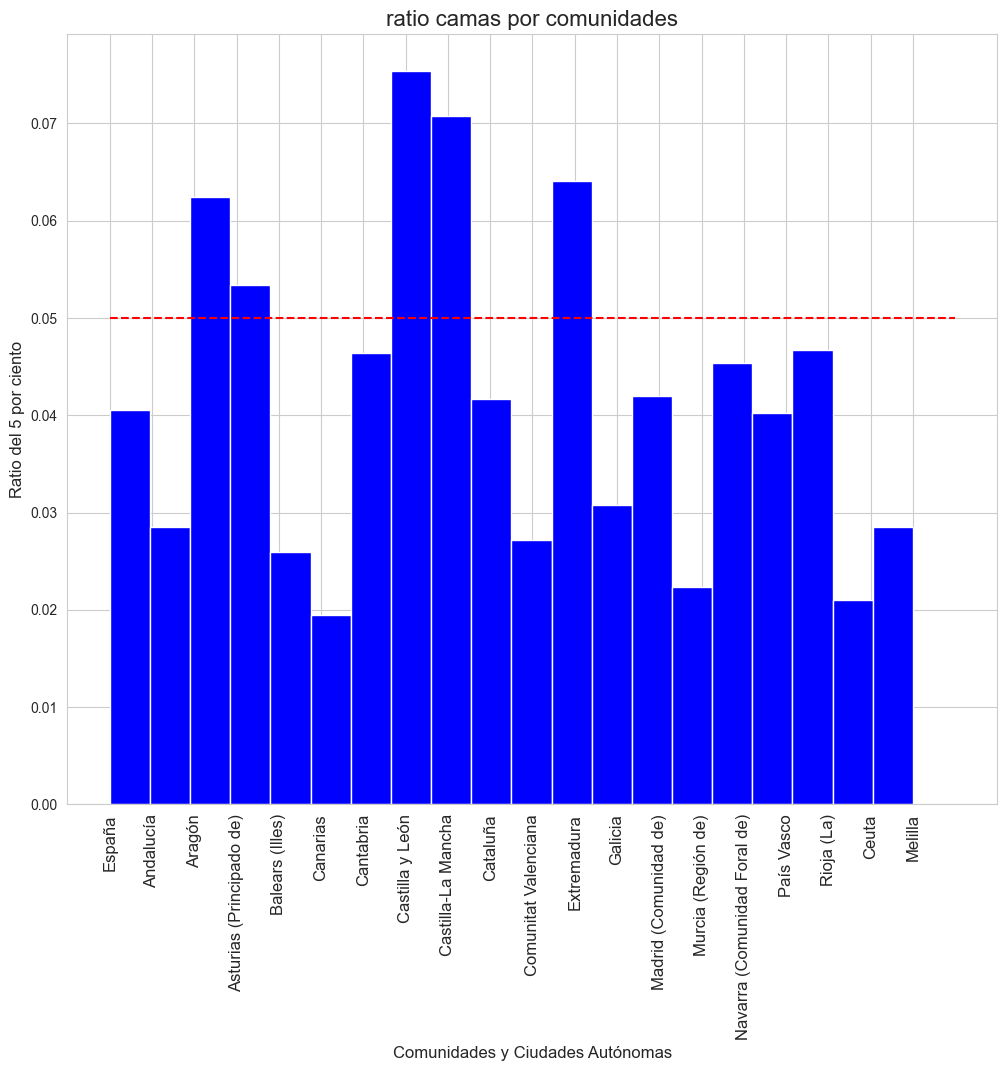

In [71]:
resis_españa_merge["ratio"] = resis_españa_merge["camas_totales"]/ resis_españa_merge["Población"]
plt.figure(figsize= (12,10))
plt.hist(resis_españa_merge["Comunidades y Ciudades Autónomas"], weights = resis_españa_merge["ratio"], bins= 20, color = "blue")
plt.xlabel("Comunidades y Ciudades Autónomas", fontsize = 12)
plt.ylabel("Ratio del 5 por ciento", fontsize = 12)
plt.hlines(y=0.05, xmin= 0, xmax=len(resis_españa_merge["Comunidades y Ciudades Autónomas"]), colors = "red", linestyles = "dashed")
plt.xticks(rotation = 90, fontsize = 12)
plt.title("ratio camas por comunidades",fontsize = 16)
plt.show()

In [72]:
# RATIO MEDIA
round(resis_españa_merge["ratio"].mean()* 100,2)

4.16

In [73]:
# RATIO MEDIANA
round(resis_españa_merge["ratio"].median()* 100, 2)

4.11

In [74]:
#  COMUNIDAD CON LA RATIO MINIMA
resis_españa_merge.loc[resis_españa_merge["ratio"].idxmin()]["Comunidades y Ciudades Autónomas"]


'Canarias'

In [75]:
# RATIO MINIMA
round(resis_españa_merge["ratio"].min()*100,2)

1.95

In [76]:
#  COMUNIDAD CON LA RATIO MAXIMA
resis_españa_merge.loc[resis_españa_merge["ratio"].idxmax()]["Comunidades y Ciudades Autónomas"]

'Castilla y León'

In [77]:
# RATIO MAXIMA
round(resis_españa_merge["ratio"].max()*100,2)

7.54

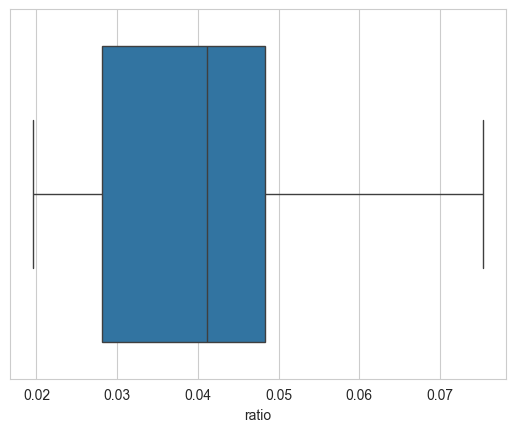

In [78]:
sns.boxplot(x=resis_españa_merge["ratio"])
sns.set_style("whitegrid")

In [79]:
# POBLACION + 64 AÑOS
Total_poblacion = resis_españa_merge["Población"].sum()
print(Total_poblacion)

18958020


In [80]:
# CAMAS DISPONIBLES
Total_camas = resis_españa_merge["camas_totales"].sum()
print(Total_camas)

768502


In [81]:
# CAMAS ESTIMADAS NECESARIAS OMS
Camas_estimadas = round(Total_poblacion * 0.05,2)
print(Camas_estimadas)

947901.0


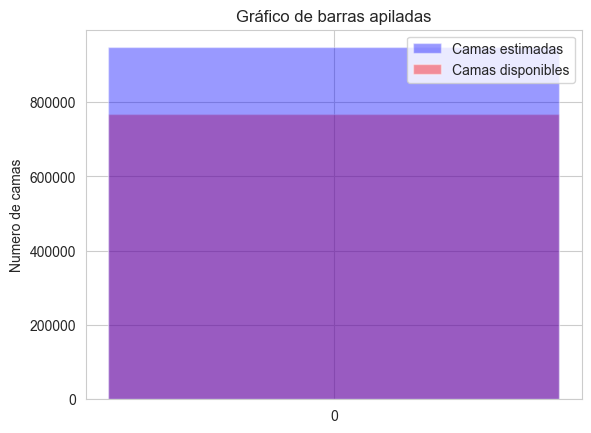

In [82]:
camas_estimadas = [Camas_estimadas]
camas_disponibles = [Total_camas]
x_pos = [0]
opacity = 0.4

fig, ax = plt.subplots()

rects1 = ax.bar(x_pos, camas_disponibles, alpha=opacity, color='r', label='Camas disponibles', width=0.2)
rects2 = ax.bar(x_pos, camas_estimadas, alpha=opacity, color='b', label='Camas estimadas', width=0.2)
ax.set_ylabel('Numero de camas')
ax.set_title('Gráfico de barras apiladas')
ax.legend((rects2[0], rects1[0]), ('Camas estimadas', 'Camas disponibles'))


ax.set_xticks(x_pos)


# Muestra el gráfico
plt.show()

In [83]:
serie_mayores_2000_2022.head()

,poblacion_por_edades,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,65-69,2.548.001,2.480.872,2.424.312,2.398.795,2.396.644,2.358.764,2.340.046,2.354.952,2.329.338,...,1.955.343,1.848.880,1.839.464,1.907.893,1.874.237,1.985.775,2.084.403,2.125.295,2.110.393,2.114.370
1,70-74,2.225.627,2.199.993,2.212.176,2.175.840,2.114.482,2.041.693,1.965.457,1.944.885,1.809.996,...,1.875.198,1.956.942,1.993.753,1.978.398,1.979.735,1.957.443,1.931.919,1.879.222,1.853.382,1.799.716
2,75-79,1.840.899,1.767.146,1.747.869,1.618.039,1.525.430,1.519.877,1.573.274,1.548.072,1.652.101,...,1.738.241,1.703.318,1.652.055,1.623.278,1.575.076,1.538.219,1.503.454,1.481.879,1.440.738,1.393.425
3,80-84,1.256.786,1.294.253,1.273.071,1.353.814,1.413.284,1.439.758,1.425.954,1.423.331,1.403.973,...,1.225.193,1.185.745,1.161.073,1.123.199,1.087.466,1.026.585,978.020,917.393,873.270,830.766
4,85-89,1.004.545,991.099,996.416,975.247,948.377,912.917,886.389,854.272,825.357,...,674.868,634.516,588.436,554.010,526.849,517.089,510.743,507.618,507.174,492.338


In [85]:
mask = serie_mayores_2000_2022.columns != "poblacion_por_edades"
serie_mayores_2000_2022_masked = serie_mayores_2000_2022.loc[:,mask]


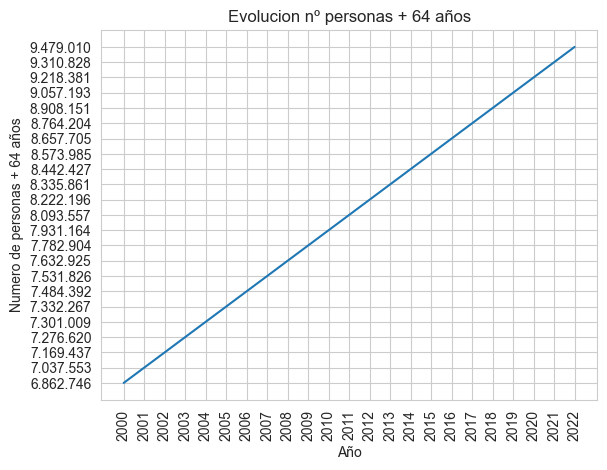

In [86]:
serie_mayores_2000_2022_masked = serie_mayores_2000_2022_masked.iloc[:,::-1]
plt.plot(serie_mayores_2000_2022_masked.columns, serie_mayores_2000_2022_masked.iloc[-1])
plt.xlabel("Año")
plt.ylabel("Numero de personas + 64 años")
plt.title("Evolucion nº personas + 64 años")
plt.xticks(rotation = 90)
plt.show()